In [ ]:
from pyhdf.SD import SD, SDC
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

In [ ]:
from pyhdf.SD import SD, SDC

file_name = 'MOD021KM.A2016268.1005.061.2017327230902.hdf'
file = SD(file_name, SDC.READ)

print(file.info())

(31, 58)


In [ ]:
datasets_dic = file.datasets()

for idx,sds in enumerate(datasets_dic.keys()):
    print(idx,sds)

0 Latitude
1 Longitude
2 EV_1KM_RefSB
3 EV_1KM_RefSB_Uncert_Indexes
4 EV_1KM_Emissive
5 EV_1KM_Emissive_Uncert_Indexes
6 EV_250_Aggr1km_RefSB
7 EV_250_Aggr1km_RefSB_Uncert_Indexes
8 EV_250_Aggr1km_RefSB_Samples_Used
9 EV_500_Aggr1km_RefSB
10 EV_500_Aggr1km_RefSB_Uncert_Indexes
11 EV_500_Aggr1km_RefSB_Samples_Used
12 Height
13 SensorZenith
14 SensorAzimuth
15 Range
16 SolarZenith
17 SolarAzimuth
18 gflags
19 EV_Band26
20 EV_Band26_Uncert_Indexes
21 Band_250M
22 Band_500M
23 Band_1KM_RefSB
24 Band_1KM_Emissive
25 Noise in Thermal Detectors
26 Change in relative responses of thermal detectors
27 DC Restore Change for Thermal Bands
28 DC Restore Change for Reflective 250m Bands
29 DC Restore Change for Reflective 500m Bands
30 DC Restore Change for Reflective 1km Bands


In [ ]:
SZA_get = file.select('SolarZenith') # select sds
VZA_get = file.select('SensorZenith') # select sds
SAA_get = file.select('SolarAzimuth') # select sds
VAA_get = file.select('SensorAzimuth') # select sds

SZA_data = SZA_get.get() # get sds data
VZA_data = VZA_get.get()
SAA_data = SAA_get.get()
VAA_data = VAA_get.get()

#[1750, 1752, 1754, 1756], [1100, 1102, 1104, 1106]
print(f"SZA (Cloud1) = {np.mean(SZA_data[1750:1756,1100:1106]*SZA_get.attributes()['scale_factor'])}")
print(f"SZA = {np.mean(SZA_data[:,:]*SZA_get.attributes()['scale_factor'])}")
print(f"VZA = {np.mean(VZA_data[:,:]*VZA_get.attributes()['scale_factor'])}")
print(f"SAA = {np.mean(SAA_data[:,:]*SAA_get.attributes()['scale_factor'])}")
print(f"VAA = {np.mean(VAA_data[:,:]*VAA_get.attributes()['scale_factor'])}")

SZA (Cloud1) = nan
SZA = 25.372505878735257
VZA = 31.42017392012156
SAA = 63.9257417155054
VAA = 8.091310596194198


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
print(SZA_data.shape)
print(SZA_get.info())

(408, 271)
('SolarZenith', 2, [408, 271], 22, 6)


In [ ]:
sds_obj = file.select('EV_250_Aggr1km_RefSB') # select sds

data = sds_obj.get() # get sds data

In [ ]:
print(data.shape)

(2, 2040, 1354)


In [ ]:
import pprint

pprint.pprint( sds_obj.attributes() )

{'_FillValue': 65535,
 'band_names': '1,2',
 'corrected_counts_offsets': [-0.0, -0.0],
 'corrected_counts_scales': [0.12497329711914062, 0.12497329711914062],
 'corrected_counts_units': 'counts',
 'long_name': 'Earth View 250M Aggregated 1km Reflective Solar Bands Scaled '
              'Integers',
 'radiance_offsets': [-0.0, -0.0],
 'radiance_scales': [0.028333760797977448, 0.010613624006509781],
 'radiance_units': 'Watts/m^2/micrometer/steradian',
 'reflectance_offsets': [-0.0, -0.0],
 'reflectance_scales': [5.575715113081969e-05, 3.38104109687265e-05],
 'reflectance_units': 'none',
 'units': 'none',
 'valid_range': [0, 32767]}


In [ ]:
sds_obj2 = file.select('EV_500_Aggr1km_RefSB') # select sds

data2 = sds_obj2.get() # get sds data

In [ ]:
import pprint

pprint.pprint( sds_obj2.attributes() )

{'_FillValue': 65535,
 'band_names': '3,4,5,6,7',
 'corrected_counts_offsets': [-0.0, -0.0, -0.0, -0.0, -0.0],
 'corrected_counts_scales': [0.12497329711914062,
                             0.12497329711914062,
                             0.12497329711914062,
                             0.12497329711914062,
                             0.12497329711914062],
 'corrected_counts_units': 'counts',
 'long_name': 'Earth View 500M Aggregated 1km Reflective Solar Bands Scaled '
              'Integers',
 'radiance_offsets': [-0.0, -0.0, -0.0, -0.0, -0.0],
 'radiance_scales': [0.037750016897916794,
                     0.027935344725847244,
                     0.006321446970105171,
                     0.0027928841300308704,
                     0.0008852750179357827],
 'radiance_units': 'Watts/m^2/micrometer/steradian',
 'reflectance_offsets': [-0.0, -0.0, -0.0, -0.0, -0.0],
 'reflectance_scales': [5.714617145713419e-05,
                        4.731997614726424e-05,
                       

In [ ]:
import numpy as np
for key, value in sds_obj.attributes().items():
    #print( key, value )
    if key == 'reflectance_offsets':
        add_offset = value
    if key == 'reflectance_scales':
        scale_factor = value

In [ ]:
for key2, value2 in sds_obj2.attributes().items():
    #print( key2, value2 )
    if key2 == 'reflectance_offsets':
        add_offset2 = value2
    if key2 == 'reflectance_scales':
        scale_factor2 = value2

In [ ]:
#---------- RGB Matrix ----------#

factor = 1.0 # factor to increase the brightness
rgb = np.zeros((2040, 1354,3))

red = (data[0,:,:]-add_offset[0])*scale_factor[0]
green = (data2[1,:,:]-add_offset2[1])*scale_factor2[1]
NIR = (data[1,:,:]-add_offset[1])*scale_factor[1]
blue = (data2[0,:,:]-add_offset2[0])*scale_factor2[0]

rgb[:,:,0]= red[:,:]/factor
rgb[:,:,1]= green[:,:]/factor
rgb[:,:,2]= blue[:,:]/factor

rgb[ rgb > 1 ] = 1.0
rgb[ rgb < 0 ] = 0.0

Text(0.5, 1.0, 'RGB Image')

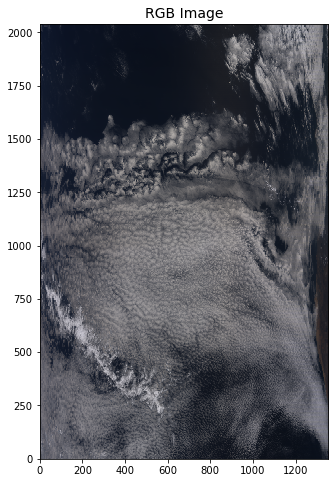

In [ ]:
#---------- Plot Image ----------#

fig = plt.figure(figsize=(10,8))
#%matplotlib tk
ax = fig.add_subplot(111)
img = plt.imshow(np.flipud(rgb), interpolation='nearest', origin='lower')
plt.title('RGB Image', fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


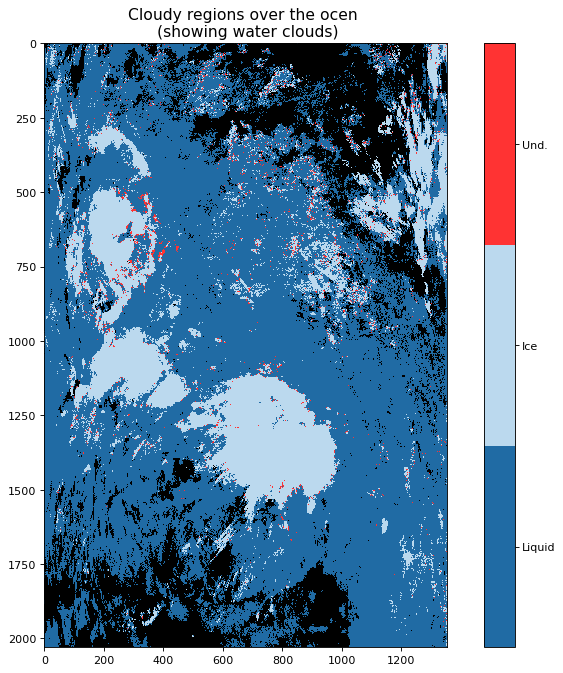

In [ ]:
from matplotlib.pyplot import figure
import matplotlib as mpl

modis_file = SD('MOD06_L2.A2016268.1000.061.2017328113132.hdf', SDC.READ)

data_selected_id = modis_file.select('Cloud_Phase_Optical_Properties')

data = data_selected_id.get()

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

cmap =  [(0.0,0.0,0.0)] + [(32./255., 107./255., 164./255.)] + \
       [(187./255., 217./255., 238./255.)] + [(255./255, 51./255, 51./255.)]
cmap = mpl.colors.ListedColormap(cmap)

bounds = [-0.5, 1.5, 2.5, 3.5, 4.5]

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#img = plt.imshow(np.fliplr(data), cmap=cmap, norm=norm,
#              interpolation='none', origin='lower')


img = plt.imshow((data), cmap=cmap, norm=norm,
              interpolation='none')

cbar_bounds = [1.5, 2.5, 3.5, 4.5]
cbar_ticks = [2.0,3.0,4.0]
cbar_labels = ['Liquid','Ice','Und.']

cbar = plt.colorbar(img, cmap=cmap, norm=norm, boundaries=cbar_bounds, ticks=cbar_ticks)
cbar.ax.set_yticklabels(cbar_labels, fontsize=10)

plt.title('Cloudy regions over the ocen \n (showing water clouds)', fontsize=14)

plt.savefig("modis_myd06_cloud_phase_optical_properties_python3_01.png", bbox_inches='tight')

plt.show()

# Creating 4 by 4 pixel for the different cloud regions based on above plot

In [ ]:
#p44_cloud1 = np.array([[1750, 1752, 1754, 1756], [1100, 1102, 1104, 1106]])
#p44_cloud2 = np.array([[1250, 1254, 1258, 1262], [1100, 1102, 1104, 1106]])
#p44_cloud3 = np.array([[1002, 1004, 1006, 1008], [610, 620, 630, 640]])
#p44_cloud4 = np.array([[950, 960, 970, 980], [700, 710, 720, 730]])
#p44_aerosol = np.array([[1000, 1002, 1004, 1006], [1202, 1204, 1206, 1208]])
#p44_smoke = np.array([[50, 100, 150, 200], [300, 200, 100, 50]])

In [ ]:
p44_cloud1 = np.array([[510, 520, 530, 540], [720, 740, 760, 780]])
p44_cloud2 = np.array([[800, 810, 820, 830], [680, 700, 720, 740]])
p44_cloud3 = np.array([[920, 940, 960, 980], [250, 300, 350, 400]])
p44_cloud4 = np.array([[1350, 1360, 1370, 1380], [220, 240, 260, 280]])
p44_aerosol = np.array([[980, 990, 1000, 1010], [1240, 1250, 1260, 1270]])
p44_smoke = np.array([[1730, 1740, 1750, 1760], [1225,1230, 1235, 1240]])

In [ ]:
from pyhdf.SD import SD, SDC

file_name2 = 'MOD021KM.A2017236.0830.061.2017317005954.hdf'
file2 = SD(file_name2, SDC.READ)
file_name3 = 'MOD021KM.A2015225.0225.061.2017321221422.hdf'
file3 = SD(file_name3, SDC.READ)

datasets_dic2 = file2.datasets()
datasets_dic3 = file3.datasets()

In [ ]:
sds_obj = file.select('EV_250_Aggr1km_RefSB') # select sds
sds_obj2 = file.select('EV_500_Aggr1km_RefSB') # select sds
data = sds_obj.get() # get sds data
data2 = sds_obj2.get() # get sds data

sds_obj3 = file2.select('EV_250_Aggr1km_RefSB') # select sds
sds_obj4 = file2.select('EV_500_Aggr1km_RefSB') # select sds
data3 = sds_obj3.get() # get sds data
data4 = sds_obj4.get() # get sds data

sds_obj5 = file3.select('EV_250_Aggr1km_RefSB') # select sds
sds_obj6 = file3.select('EV_500_Aggr1km_RefSB') # select sds
data5 = sds_obj5.get() # get sds data
data6 = sds_obj6.get() # get sds data

In [ ]:
for key3, value3 in sds_obj3.attributes().items():
    #print( key, value )
    if key3 == 'reflectance_offsets':
        add_offset3 = value3
    if key3 == 'reflectance_scales':
        scale_factor3 = value3
for key4, value4 in sds_obj4.attributes().items():
    #print( key, value )
    if key4 == 'reflectance_offsets':
        add_offset4 = value4
    if key4 == 'reflectance_scales':
        scale_factor4 = value4
for key5, value5 in sds_obj5.attributes().items():
    #print( key, value )
    if key5 == 'reflectance_offsets':
        add_offset5 = value5
    if key5 == 'reflectance_scales':
        scale_factor5 = value5
for key6, value6 in sds_obj6.attributes().items():
    #print( key, value )
    if key6 == 'reflectance_offsets':
        add_offset6 = value6
    if key6 == 'reflectance_scales':
        scale_factor6 = value6

In [ ]:
reflectance3 = np.zeros((2030, 1354,7))

band1s = (data5[0,:,:]-add_offset5[0])*scale_factor5[0]
band2s = (data5[1,:,:]-add_offset5[1])*scale_factor5[1]
band3s = (data6[0,:,:]-add_offset6[0])*scale_factor6[0]
band4s = (data6[1,:,:]-add_offset6[1])*scale_factor6[1]
band5s = (data6[2,:,:]-add_offset6[2])*scale_factor6[2]
band6s = (data6[3,:,:]-add_offset6[3])*scale_factor6[3]
band7s = (data6[4,:,:]-add_offset6[4])*scale_factor6[4]

reflectance3[:,:,0]= band1s[:,:]
reflectance3[:,:,1]= band2s[:,:]
reflectance3[:,:,2]= band3s[:,:]
reflectance3[:,:,3]= band4s[:,:]
reflectance3[:,:,4]= band5s[:,:]
reflectance3[:,:,5]= band6s[:,:]
reflectance3[:,:,6]= band7s[:,:]

reflectance3[ reflectance3 > 1 ] = 1.0
reflectance3[ reflectance3 < 0 ] = 0.0

In [ ]:
reflectance2 = np.zeros((2030, 1354,7))

band1a = (data3[0,:,:]-add_offset3[0])*scale_factor3[0]
band2a = (data3[1,:,:]-add_offset3[1])*scale_factor3[1]
band3a = (data4[0,:,:]-add_offset4[0])*scale_factor4[0]
band4a = (data4[1,:,:]-add_offset4[1])*scale_factor4[1]
band5a = (data4[2,:,:]-add_offset4[2])*scale_factor4[2]
band6a = (data4[3,:,:]-add_offset4[3])*scale_factor4[3]
band7a = (data4[4,:,:]-add_offset4[4])*scale_factor4[4]

reflectance2[:,:,0]= band1a[:,:]
reflectance2[:,:,1]= band2a[:,:]
reflectance2[:,:,2]= band3a[:,:]
reflectance2[:,:,3]= band4a[:,:]
reflectance2[:,:,4]= band5a[:,:]
reflectance2[:,:,5]= band6a[:,:]
reflectance2[:,:,6]= band7a[:,:]

reflectance2[ reflectance2 > 1 ] = 1.0
reflectance2[ reflectance2 < 0 ] = 0.0

In [ ]:
reflectance = np.zeros((2040, 1354,7))

band1 = (data[0,:,:]-add_offset[0])*scale_factor[0]
band2 = (data[1,:,:]-add_offset[1])*scale_factor[1]
band3 = (data2[0,:,:]-add_offset2[0])*scale_factor2[0]
band4 = (data2[1,:,:]-add_offset2[1])*scale_factor2[1]
band5 = (data2[2,:,:]-add_offset2[2])*scale_factor2[2]
band6 = (data2[3,:,:]-add_offset2[3])*scale_factor2[3]
band7 = (data2[4,:,:]-add_offset2[4])*scale_factor2[4]

reflectance[:,:,0]= band1[:,:]
reflectance[:,:,1]= band2[:,:]
reflectance[:,:,2]= band3[:,:]
reflectance[:,:,3]= band4[:,:]
reflectance[:,:,4]= band5[:,:]
reflectance[:,:,5]= band6[:,:]
reflectance[:,:,6]= band7[:,:]

reflectance[ reflectance > 1 ] = 1.0
reflectance[ reflectance < 0 ] = 0.0

In [ ]:
band1_cl1 = np.mean(reflectance[p44_cloud1[0],p44_cloud1[1],0])
band2_cl1 = np.mean(reflectance[p44_cloud1[0],p44_cloud1[1],1])
band3_cl1 = np.mean(reflectance[p44_cloud1[0],p44_cloud1[1],2])
band4_cl1 = np.mean(reflectance[p44_cloud1[0],p44_cloud1[1],3])
band5_cl1 = np.mean(reflectance[p44_cloud1[0],p44_cloud1[1],4])
band6_cl1 = np.mean(reflectance[p44_cloud1[0],p44_cloud1[1],5])
band7_cl1 = np.mean(reflectance[p44_cloud1[0],p44_cloud1[1],6])

cl1_ref = []
cl1_ref.append(band3_cl1)
cl1_ref.append(band4_cl1)
cl1_ref.append(band1_cl1)
cl1_ref.append(band2_cl1)
cl1_ref.append(band5_cl1)
cl1_ref.append(band6_cl1)
cl1_ref.append(band7_cl1)

band1_cl2 = np.mean(reflectance[p44_cloud2[0],p44_cloud2[1],0])
band2_cl2 = np.mean(reflectance[p44_cloud2[0],p44_cloud2[1],1])
band3_cl2 = np.mean(reflectance[p44_cloud2[0],p44_cloud2[1],2])
band4_cl2 = np.mean(reflectance[p44_cloud2[0],p44_cloud2[1],3])
band5_cl2 = np.mean(reflectance[p44_cloud2[0],p44_cloud2[1],4])
band6_cl2 = np.mean(reflectance[p44_cloud2[0],p44_cloud2[1],5])
band7_cl2 = np.mean(reflectance[p44_cloud2[0],p44_cloud2[1],6])

cl2_ref = []
cl2_ref.append(band3_cl2)
cl2_ref.append(band4_cl2)
cl2_ref.append(band1_cl2)
cl2_ref.append(band2_cl2)
cl2_ref.append(band5_cl2)
cl2_ref.append(band6_cl2)
cl2_ref.append(band7_cl2)

band1_cl3 = np.mean(reflectance[p44_cloud3[0],p44_cloud3[1],0])
band2_cl3 = np.mean(reflectance[p44_cloud3[0],p44_cloud3[1],1])
band3_cl3 = np.mean(reflectance[p44_cloud3[0],p44_cloud3[1],2])
band4_cl3 = np.mean(reflectance[p44_cloud3[0],p44_cloud3[1],3])
band5_cl3 = np.mean(reflectance[p44_cloud3[0],p44_cloud3[1],4])
band6_cl3 = np.mean(reflectance[p44_cloud3[0],p44_cloud3[1],5])
band7_cl3 = np.mean(reflectance[p44_cloud3[0],p44_cloud3[1],6])

cl3_ref = []
cl3_ref.append(band3_cl3)
cl3_ref.append(band4_cl3)
cl3_ref.append(band1_cl3)
cl3_ref.append(band2_cl3)
cl3_ref.append(band5_cl3)
cl3_ref.append(band6_cl3)
cl3_ref.append(band7_cl3)

band1_cl4 = np.mean(reflectance[p44_cloud4[0],p44_cloud4[1],0])
band2_cl4 = np.mean(reflectance[p44_cloud4[0],p44_cloud4[1],1])
band3_cl4 = np.mean(reflectance[p44_cloud4[0],p44_cloud4[1],2])
band4_cl4 = np.mean(reflectance[p44_cloud4[0],p44_cloud4[1],3])
band5_cl4 = np.mean(reflectance[p44_cloud4[0],p44_cloud4[1],4])
band6_cl4 = np.mean(reflectance[p44_cloud4[0],p44_cloud4[1],5])
band7_cl4 = np.mean(reflectance[p44_cloud4[0],p44_cloud4[1],6])

cl4_ref = []
cl4_ref.append(band3_cl4)
cl4_ref.append(band4_cl4)
cl4_ref.append(band1_cl4)
cl4_ref.append(band2_cl4)
cl4_ref.append(band5_cl4)
cl4_ref.append(band6_cl4)
cl4_ref.append(band7_cl4)

band1_ar = np.mean(reflectance2[p44_aerosol[0],p44_aerosol[1],0])
band2_ar = np.mean(reflectance2[p44_aerosol[0],p44_aerosol[1],1])
band3_ar = np.mean(reflectance2[p44_aerosol[0],p44_aerosol[1],2])
band4_ar = np.mean(reflectance2[p44_aerosol[0],p44_aerosol[1],3])
band5_ar = np.mean(reflectance2[p44_aerosol[0],p44_aerosol[1],4])
band6_ar = np.mean(reflectance2[p44_aerosol[0],p44_aerosol[1],5])
band7_ar =np.mean(reflectance2[p44_aerosol[0],p44_aerosol[1],6])

ar_ref = []
ar_ref.append(band3_ar)
ar_ref.append(band4_ar)
ar_ref.append(band1_ar)
ar_ref.append(band2_ar)
ar_ref.append(band5_ar)
ar_ref.append(band6_ar)
ar_ref.append(band7_ar)


band1_sm= np.mean(reflectance3[p44_smoke[0],p44_smoke[1],0])
band2_sm= np.mean(reflectance3[p44_smoke[0],p44_smoke[1],1])
band3_sm= np.mean(reflectance3[p44_smoke[0],p44_smoke[1],2])
band4_sm= np.mean(reflectance3[p44_smoke[0],p44_smoke[1],3])
band5_sm= np.mean(reflectance3[p44_smoke[0],p44_smoke[1],4])
band6_sm= np.mean(reflectance3[p44_smoke[0],p44_smoke[1],5])
band7_sm=np.mean(reflectance3[p44_smoke[0],p44_smoke[1],6])

sm_ref = []
sm_ref.append(band3_sm)
sm_ref.append(band4_sm)
sm_ref.append(band1_sm)
sm_ref.append(band2_sm)
sm_ref.append(band5_sm)
sm_ref.append(band6_sm)
sm_ref.append(band7_sm)

print(cl1_ref)
print(cl2_ref)
print(cl3_ref)
print(cl4_ref)
print(ar_ref)
print(sm_ref)

[0.40885228369006654, 0.3996053685696097, 0.4025805704523009, 0.44766674643142323, 0.46394423411493335, 0.41560992055383394, 0.2613254009256707]
[0.33009057287927135, 0.3138734017848037, 0.3120448963036324, 0.3451535803742445, 0.3676845195623173, 0.35382100506467395, 0.2671493259322233]
[0.3606209149802453, 0.338101229572203, 0.3378325787016365, 0.3763859475066056, 0.38839810215995385, 0.33722086080524605, 0.21292176888982794]
[0.43402517221693415, 0.4172793796606129, 0.4252179738114137, 0.48422425329135876, 0.4985160143223766, 0.42137909077791846, 0.25211709396717197]
[0.20180704297672492, 0.17803680997531046, 0.16292325427821197, 0.1528131802479038, 0.1314118696791411, 0.12157334730909497, 0.09242135541080643]
[0.703494304769265, 0.6419580498550204, 0.6339379900509812, 0.6747092087825877, 0.5927639144101704, 0.44646642177394824, 0.28431438998541125]


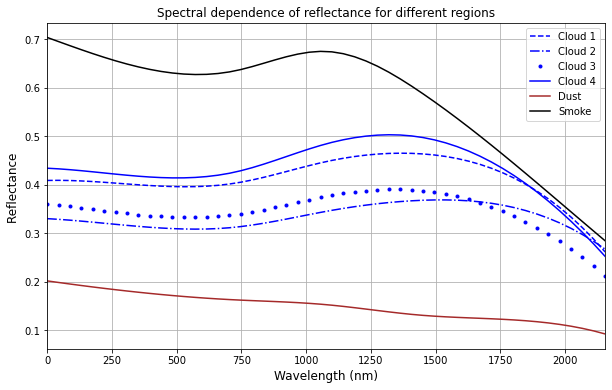

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline

wavelength=np.linspace(0,2155,7)
X_Y_Spline1 = make_interp_spline(wavelength,cl1_ref)
X_Y_Spline2 = make_interp_spline(wavelength,cl2_ref)
X_Y_Spline3 = make_interp_spline(wavelength,cl3_ref)
X_Y_Spline4 = make_interp_spline(wavelength,cl4_ref)
X_Y_Spline5 = make_interp_spline(wavelength,ar_ref)
X_Y_Spline6 = make_interp_spline(wavelength,sm_ref)

# Returns evenly spaced numbers
# over a specified interval.
X1_ = np.linspace(wavelength.min(), wavelength.max(), 50)
Y1_ = X_Y_Spline1(X1_)
Y2_ = X_Y_Spline2(X1_)
Y3_ = X_Y_Spline3(X1_)
Y4_ = X_Y_Spline4(X1_)
Y5_ = X_Y_Spline5(X1_)
Y6_ = X_Y_Spline6(X1_)

# Plotting the Graph
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(X1_,Y1_,"--",label="Cloud 1",color="blue")
ax.plot(X1_,Y2_,'-.',label="Cloud 2",color="blue")
ax.plot(X1_,Y3_,'.',label="Cloud 3",color="blue")
ax.plot(X1_,Y4_,label="Cloud 4",color="blue")
ax.plot(X1_,Y5_,label="Dust",color="brown")
ax.plot(X1_,Y6_,label="Smoke",color="black")
ax.set_xlim([0,2155])

plt.legend()
#ax.set_xscale('log')
ax.set_xlabel('Wavelength (nm)',fontsize='large')
ax.set_ylabel('Reflectance ',fontsize='large')
ax.grid(True)
ax.set_title('Spectral dependence of reflectance for different regions',fontsize='large')
plt.show()